<a href="https://colab.research.google.com/github/Prajwal270/TensorFlow1.1/blob/master/Tf_cnn_with_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
print(tf.__version__)

1.15.0


In [3]:
from keras.datasets import mnist

Using TensorFlow backend.


In [4]:
(train_image, train_label),(test_image, test_label) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [5]:
train_image.shape

(60000, 28, 28)

In [6]:
train_label.shape

(60000,)

In [7]:
test_image.shape

(10000, 28, 28)

In [8]:
test_label.shape

(10000,)

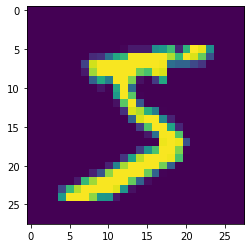

In [9]:
plt.imshow(train_image[0])

In [10]:
train_label[0]

5

In [11]:
test_label

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [0]:
#Normalizing the data 
train_image = train_image/255.0
test_image = test_image/255.0

In [13]:
train_image.shape

(60000, 28, 28)

In [0]:
train_image = train_image.reshape(60000,28,28,1)
test_image = test_image.reshape(10000, 28 ,28,1)

In [15]:
# Now we define our model 
model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(64, (3,3), input_shape=(28,28,1), activation=tf.nn.relu),
        tf.keras.layers.MaxPool2D(2,2),
        tf.keras.layers.Conv2D(64, (3,3), activation=tf.nn.relu),
        tf.keras.layers.MaxPool2D(2,2),
        
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),
        tf.keras.layers.Dense(10, activation=tf.nn.softmax) 
                             
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam', metrics =['accuracy'])

In [17]:
model.fit(train_image, train_label, validation_data=(test_image, test_label), epochs=5, batch_size=100)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 75s 1ms/sample - loss: 0.1712 - acc: 0.9478 - val_loss: 0.0511 - val_acc: 0.9835
Epoch 2/5
60000/60000 [==============================] - 74s 1ms/sample - loss: 0.0479 - acc: 0.9856 - val_loss: 0.0357 - val_acc: 0.9867
Epoch 3/5
60000/60000 [==============================] - 75s 1ms/sample - loss: 0.0335 - acc: 0.9896 - val_loss: 0.0380 - val_acc: 0.9878
Epoch 4/5
60000/60000 [==============================] - 74s 1ms/sample - loss: 0.0251 - acc: 0.9920 - val_loss: 0.0299 - val_acc: 0.9891
Epoch 5/5
60000/60000 [==============================] - 74s 1ms/sample - loss: 0.0195 - acc: 0.9936 - val_loss: 0.0252 - val_acc: 0.9906


In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [19]:
r = model.evaluate(test_image, test_label)

10000/10000 [==============================] - 4s 400us/sample - loss: 0.0252 - acc: 0.9906


In [22]:
test_label[0]

7